In [6]:
import os
os.chdir(os.path.expanduser("~"))

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [78]:
housing = pd.read_csv('Desktop/report/BostonHousing.csv', header=0, na_values='?')
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* 欠損値検定

In [4]:
housing.isnull().any(axis = 0)

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

* データは量的か質的かを判断

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [61]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* 外れ値検定と除外

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


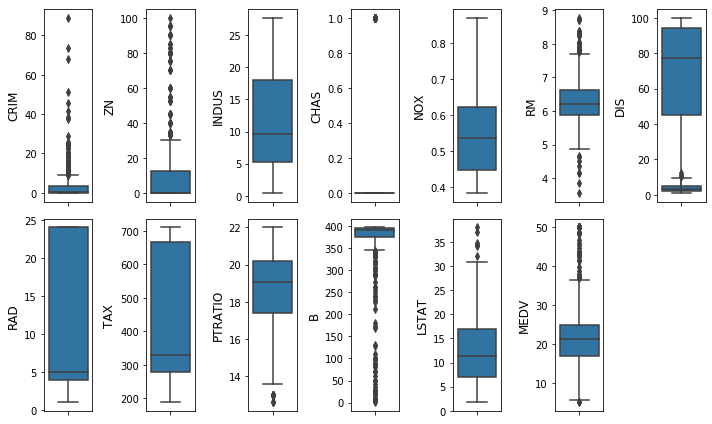

In [70]:
col = housing.columns.tolist()
plt.figure(figsize = (10,6))
for i in range(7):
    plt.subplot(2,7,i+1)
    sns.boxplot(housing[col[i]], orient='v')
    plt.ylabel(col[i],fontsize=12)
plt.tight_layout()
for i in range(7):
    plt.subplot(2,7,i+7)
    sns.boxplot(housing[col[i+7]], orient='v')
    plt.ylabel(col[i+7],fontsize=12)
plt.tight_layout()

In [71]:
housing_1 = housing.drop(labels='MEDV',axis=1)
for col in housing_1.columns.values:
    med = np.median(housing[col])
    st = np.std(housing[col])
    housing2 = housing[(housing[col] < med+2*st) & (housing[col] > med-2*st)]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


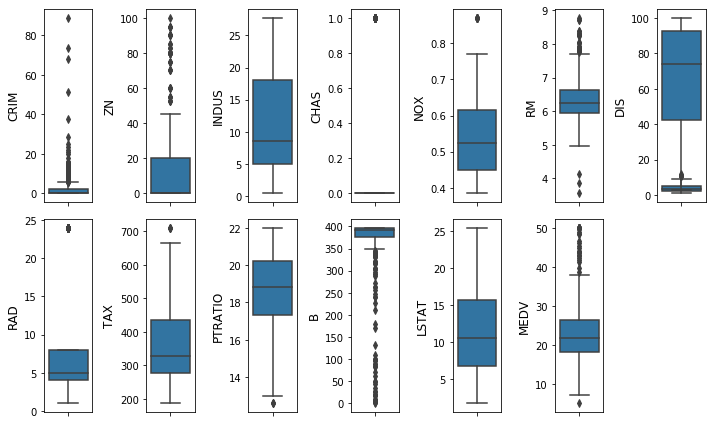

In [72]:
col = housing2.columns.tolist()
plt.figure(figsize = (10,6))
for i in range(7):
    plt.subplot(2,7,i+1)
    sns.boxplot(housing2[col[i]], orient='v')
    plt.ylabel(col[i],fontsize=12)
plt.tight_layout()
for i in range(7):
    plt.subplot(2,7,i+7)
    sns.boxplot(housing2[col[i+7]], orient='v')
    plt.ylabel(col[i+7],fontsize=12)
plt.tight_layout()

In [73]:
print(housing.shape)
print(housing2.shape)

(506, 14)
(473, 14)


* 各変数間の相関度を計算

In [251]:
def np_corr(X,y):   
    corr = []
    for col in X.columns.values:
        corr.append(abs(np.corrcoef(X[col].values,y)[0,1]))
    corr_order = pd.DataFrame({'col':X.columns,'corr_value':corr})
    corr_order = corr_order.sort_values(by='corr_value',ascending=False)
    return corr_order

In [191]:
housing1 = housing.drop(columns=['MEDV'], axis=1)
corr = np_corr(housing1, housing['MEDV'])
print(corr)

        col  corr_value
12    LSTAT    0.737663
5        RM    0.695360
10  PTRATIO    0.507787
2     INDUS    0.483725
9       TAX    0.468536
4       NOX    0.427321
0      CRIM    0.388305
8       RAD    0.381626
6       AGE    0.376955
1        ZN    0.360445
11        B    0.333461
7       DIS    0.249929
3      CHAS    0.175260


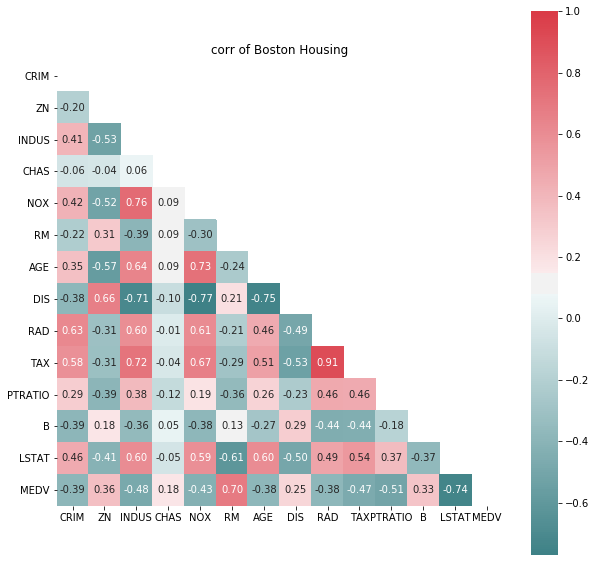

In [192]:
plt.figure(figsize = (10,10))
corr = housing.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.title('corr of Boston Housing')
plt.show()

* 相関係数によって変数を取り除く

In [35]:
#housing1=housing.drop(labels=['CHAS','DIS'],axis=1)
#housing1=housing.drop(labels=['DIS'],axis=1)
#housing1=housing.drop(labels=['RAD'],axis=1)
#housing1=housing.drop(labels=['TAX'],axis=1)
housing1=housing.drop(labels=['LSTAT'],axis=1)

* データを訓練用とテスト用に分割

In [51]:
X_train, X_test = train_test_split(housing, test_size=0.2, random_state=42)

y_train = np.matrix(X_train['MEDV']).T
X_train = np.matrix(X_train.drop(['MEDV'], axis=1))

y_test = np.matrix(X_test['MEDV']).T
X_test = np.matrix(X_test.drop(['MEDV'], axis=1))

In [52]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

* モデルを選択

In [64]:
models = {'Ridge                    ':Ridge(),
          'Lasso                    ':Lasso(),
          'SVR                      ':SVR(),
          'DecisionTreeRegressor    ':DecisionTreeRegressor(),
          'RandomForestRegressor    ':RandomForestRegressor(),
          'GradientBoostingRegressor':GradientBoostingRegressor(),
          'ElasticNet               ':ElasticNet()}

In [65]:
score = {}
for key,model in models.items():
    model.fit(X_train, np.ravel(y_train)) 
    y_pred = model.predict(X_test)
    score[key] = 'MSE: {:.4f}, MAE: {:.4f}'.format(
                  mean_squared_error(y_test, y_pred),
                  mean_absolute_error(y_test, y_pred))
score

{'Ridge                    ': 'MSE: 27.4019, MAE: 3.8501',
 'Lasso                    ': 'MSE: 28.8379, MAE: 3.9644',
 'SVR                      ': 'MSE: 28.2905, MAE: 3.1720',
 'DecisionTreeRegressor    ': 'MSE: 25.1407, MAE: 3.4696',
 'RandomForestRegressor    ': 'MSE: 11.1240, MAE: 2.3980',
 'GradientBoostingRegressor': 'MSE: 7.8012, MAE: 2.1550',
 'ElasticNet               ': 'MSE: 29.3789, MAE: 3.9426'}

* ハイパーパラメータを交差検定で調整

In [116]:
param_grid = [{"n_estimators":range(1,300,10)}]
gs = GridSearchCV(estimator = RandomForestRegressor(random_state=42),          
                  param_grid = param_grid,
                  cv = 10) 
gs = gs.fit(X_train,np.ravel(y_train))
print(gs.best_score_)
print(gs.best_params_)

0.8262158675036263
{'n_estimators': 211}


In [121]:
model = RandomForestRegressor(n_estimators=81,random_state=42)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

10.037364252818952
2.2793754538852578


In [122]:
param_grid = [{"n_estimators":range(1,300,10)}]
gs = GridSearchCV(estimator = GradientBoostingRegressor(),          
                  param_grid = param_grid,
                  cv = 10) 
gs = gs.fit(X_train,np.ravel(y_train))
print(gs.best_score_)
print(gs.best_params_)

0.8536718351500632
{'n_estimators': 141}


In [124]:
model = GradientBoostingRegressor(n_estimators=71, random_state=42)
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

7.270048470759894
2.1039618958671342


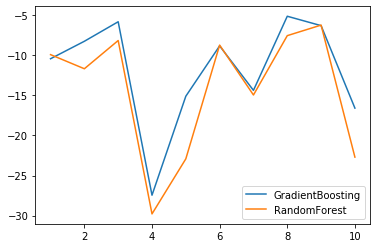

In [79]:
model_g = GradientBoostingRegressor(random_state=42)
model_r = RandomForestRegressor(random_state=42)
score_g = cross_val_score(model_g,X_train,np.ravel(y_train),cv=10,scoring='neg_mean_squared_error')
score_r = cross_val_score(model_r,X_train,np.ravel(y_train),cv=10,scoring='neg_mean_squared_error')

plt.plot(range(1,11),score_g,label="GradientBoosting")
plt.plot(range(1,11),score_r,label="RandomForest")
plt.legend()
plt.show()

* データにPCAを適用

In [165]:
dimension = [i for i in range(2,14)]
MSE = []

Text(0, 0.5, 'MSE')

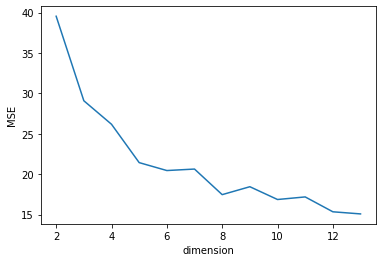

In [166]:
for i in dimension:
    pca = PCA(n_components=i).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = GradientBoostingRegressor(n_estimators=81, random_state=42)
    model.fit(X_train_pca, np.ravel(y_train))
    y_pred = model.predict(X_test_pca)
    MSE.append(mean_squared_error(y_test, y_pred))
plt.plot(dimension, MSE)
plt.xlabel('dimension')
plt.ylabel('MSE')

In [53]:
dimension = [i for i in range(2,14)]
MSE = []

Text(0, 0.5, 'MSE')

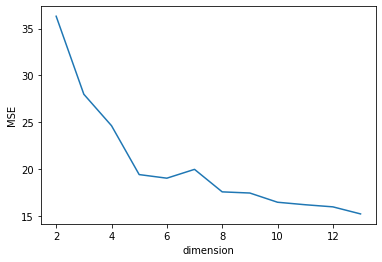

In [54]:
for i in dimension:
    pca = PCA(n_components=i).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = RandomForestRegressor(n_estimators=71, random_state=42)
    model.fit(X_train_pca, np.ravel(y_train))
    y_pred = model.predict(X_test_pca)
    MSE.append(mean_squared_error(y_test, y_pred))
plt.plot(dimension, MSE)
plt.xlabel('dimension')
plt.ylabel('MSE')

* 変数を取り除いてからの予測精度を計算

In [36]:
X_train1, X_test1 = train_test_split(housing1, test_size=0.2, random_state=42)

y_train1 = np.matrix(X_train1['MEDV']).T
X_train1 = np.matrix(X_train1.drop(['MEDV'], axis=1))

y_test1 = np.matrix(X_test1['MEDV']).T
X_test1 = np.matrix(X_test1.drop(['MEDV'], axis=1))

In [37]:
X_train1 = StandardScaler().fit_transform(X_train1)
X_test1 = StandardScaler().fit_transform(X_test1)

In [38]:
model = GradientBoostingRegressor(n_estimators=71, random_state=42)
model.fit(X_train1, np.ravel(y_train1))
y_pred1 = model.predict(X_test1)
print(mean_squared_error(y_test1, y_pred1))
print(mean_absolute_error(y_test1, y_pred1))

10.991323032652167
2.43457979914058


In [39]:
model = RandomForestRegressor(n_estimators=81,random_state=42)
model.fit(X_train1, np.ravel(y_train1))
y_pred1 = model.predict(X_test1)
print(mean_squared_error(y_test1, y_pred1))
print(mean_absolute_error(y_test1, y_pred1))

15.040981781830249
2.6747155652384422


* 外れ値排除を行ってからの予測精度を計算

In [74]:
X_train2, X_test2 = train_test_split(housing2, test_size=0.2, random_state=42)

y_train2 = np.matrix(X_train2['MEDV']).T
X_train2 = np.matrix(X_train2.drop(['MEDV'], axis=1))

y_test2 = np.matrix(X_test2['MEDV']).T
X_test2 = np.matrix(X_test2.drop(['MEDV'], axis=1))

In [75]:
X_train2 = StandardScaler().fit_transform(X_train2)
X_test2 = StandardScaler().fit_transform(X_test2)

In [76]:
model = GradientBoostingRegressor(n_estimators=71, random_state=42)
model.fit(X_train2, np.ravel(y_train2))
y_pred2 = model.predict(X_test2)
print(mean_squared_error(y_test2, y_pred2))
print(mean_absolute_error(y_test2, y_pred2))

14.884204796313249
2.297068979569451


In [77]:
model = RandomForestRegressor(n_estimators=81, random_state=42)
model.fit(X_train2, np.ravel(y_train2))
y_pred2 = model.predict(X_test2)
print(mean_squared_error(y_test2, y_pred2))
print(mean_absolute_error(y_test2, y_pred2))

14.92384962176818
2.4385315139701094
